Aquesta base de dades recull les diferents candidatures a llocs de feina i quina persona hi ha accedit.

En aquest cas mantenim tan sols la columna **ata d’inici de contracte** més recent per posteriorment calcular el temps que ha trigat la persona a trobar feina.

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv ('Candidatures.csv',encoding='utf-8',sep=';')
df_dic=pd.read_csv('Dict.csv',encoding='utf-8',sep=',')

In [3]:
#seleccionem columnes
df=df[['stic_job_applications_contactscontacts_ida','Estat','Data inici de contracte o col·locació']]
df.head()

,stic_job_applications_contactscontacts_ida,Estat,Data inici de contracte o col·locació
0,704479ea-d2a7-181c-b77b-5db827b9a0ea,Acceptada,19/11/2018
1,1d7ef175-9a25-2d41-3f92-5ebcfb9c2d92,Acceptada,22/04/2021
2,d7366cf1-3ddd-9d0f-8809-5db6c6aab2e3,Acceptada,31/12/2019
3,1c7da56d-7fe8-9075-871e-5e0dc54da398,Presentada,NaN
4,c1142452-aaf4-4e8b-dd93-5fd336468e08,Prevista presentació,NaN


In [4]:
#cambiar nombre stic_job_applications_contactscontacts_ida a ID
df.rename(columns={'stic_job_applications_contactscontacts_ida':'ID'},inplace=True)


In [5]:
#a partir del diccionari creat anteriorment, cambiem la ID per tal d'evitar duplicats
df['ID'] = df['ID'].map(df_dic.set_index('ID')['IDN'])
df.head()

,ID,Estat,Data inici de contracte o col·locació
0,704479ea-d2a7-181c-b77b-5db827b9a0ea,Acceptada,19/11/2018
1,1d7ef175-9a25-2d41-3f92-5ebcfb9c2d92,Acceptada,22/04/2021
2,d7366cf1-3ddd-9d0f-8809-5db6c6aab2e3,Acceptada,31/12/2019
3,1c7da56d-7fe8-9075-871e-5e0dc54da398,Presentada,NaN
4,c1142452-aaf4-4e8b-dd93-5fd336468e08,Prevista presentació,NaN


Ja que hi ha diferents estats en que pot estar una candidatura seleccionarem només aquelles acceptades ja que representen les ofertes de feina a les quals s'ha presentat una persona i que ha guanyat la plaça

In [6]:
#seleccionem files amb estat = Acceptada en df per escollir les dades de candidatures acceptades i eliminem la columna
df=df[df['Estat']=='Acceptada']
df=df[['ID', 'Data inici de contracte o col·locació']]

<AxesSubplot: title={'center': 'Dades incompletes a Candidatures'}>

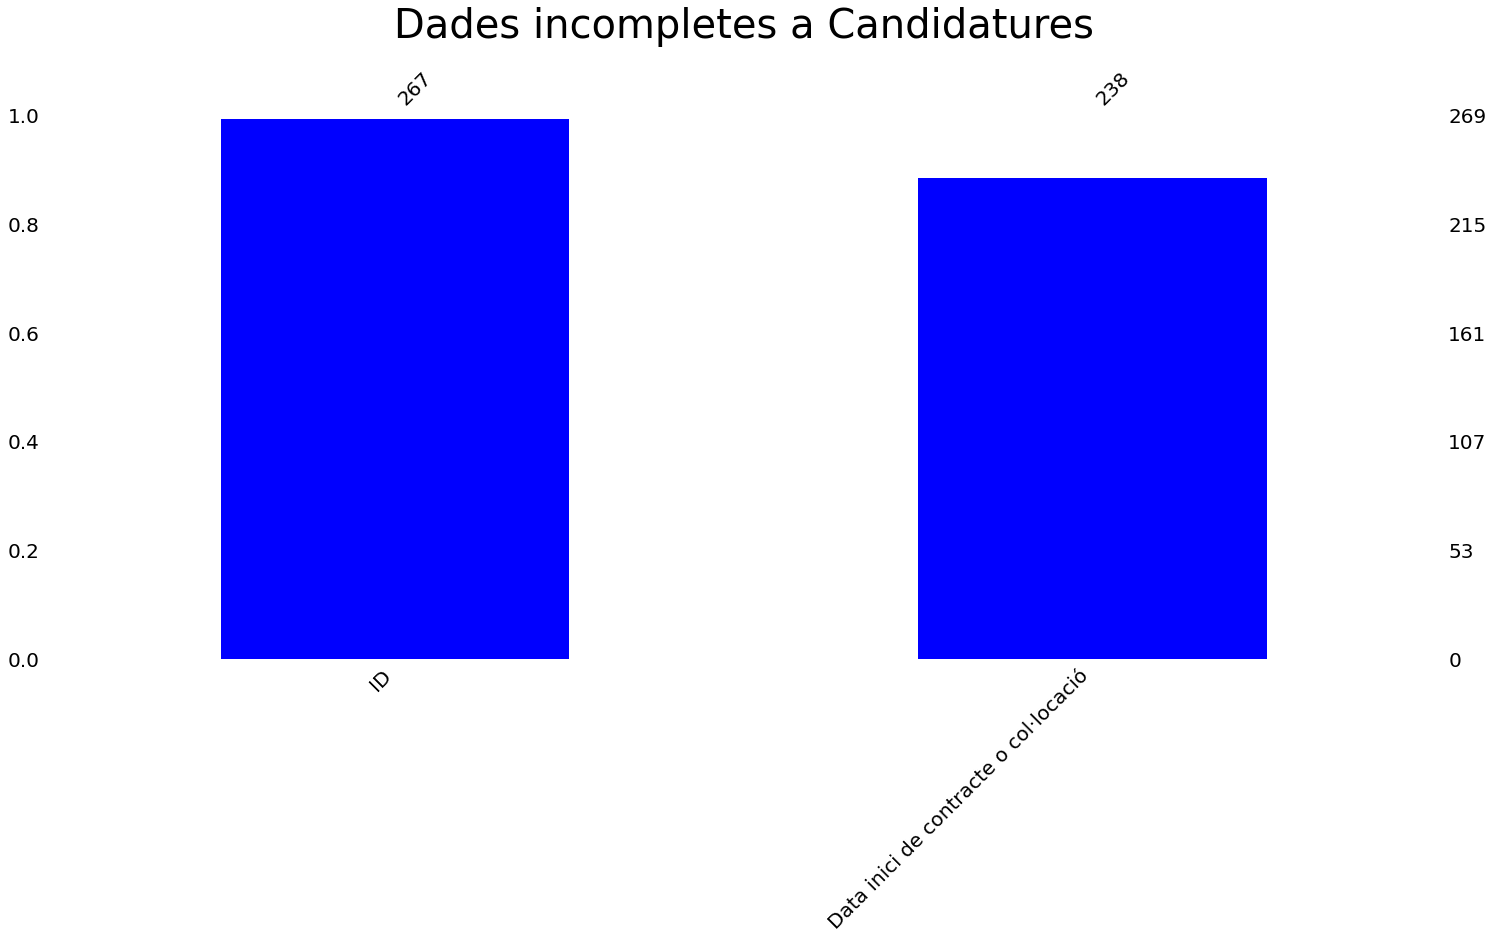

In [7]:
#detectem el nombre de dades inclompletes
import missingno as msno
import matplotlib.pyplot as plt
# Visualize the number of missing values as a bar chart
plt.title('Dades incompletes a Candidatures',fontsize=40, pad=30)
msno.bar(df, color='b',fontsize=20)

In [9]:
#eliminar nulls a Data inici de contracte
df=df.dropna(subset=['Data inici de contracte o col·locació'])

In [10]:
#eliminem files amb nulls a ID
df=df.dropna(subset=['ID'])


In [11]:
#Data inici de contracte o col·locació a datatime
df['Data inici de contracte o col·locació']=pd.to_datetime(df['Data inici de contracte o col·locació'])

/tmp/ipykernel_13769/1420689585.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Data inici de contracte o col·locació']=pd.to_datetime(df['Data inici de contracte o col·locació'])


Per tal de recollir la última data d'inici de contracte mantindrem només la més recent

In [12]:
#Mantenim els valors de Data inici de contracte o col·locació més recent
#ordenem per Data inici de contracte o col·locació
df = df.sort_values(by=['ID', 'Data inici de contracte o col·locació'], ascending=False)

In [13]:
# Eliminem els duplicats, mantenint només el primer registre
df = df.drop_duplicates(subset=['ID'], keep='first') 

In [14]:
#seleccionem columnes
df=df[[ 'ID','Data inici de contracte o col·locació']]

In [15]:
df.head()

,ID,Data inici de contracte o col·locació
954,f3df28a7-263c-adc9-b014-5df777fa7700,2022-05-15
955,f239a3c4-c428-3ce1-ec5a-5ce6862fc33c,2022-05-23
1100,ee94feb1-9faf-014c-7827-620508e2e108,2022-10-24
749,e3e8045e-e684-b056-3187-5bf7c92c95f0,2022-03-21
338,e159ebc7-8ae6-7d4e-d55b-5e0dc54d0640,2019-09-17


In [16]:
#pasar df a csv
df.to_csv ('Candidatures_final.csv',index=False,encoding='utf-8')